In [2]:
from sympy import *
import numpy as np

Mb = 844.6 + 14.6
Mm = 1001.0
xb = 0.5
xm = 1-.215

xcm = (Mb*xb + Mm*xm)/(Mb + Mm)
print(xcm)

0.653362541662187


In [3]:
xm = 1-.015

xcm = (Mb*xb + Mm*xm)/(Mb + Mm)
print(xcm)

0.7609853779163531


In [80]:
Kes = np.array([7.66, 8.15, 12.0, 13.3, 18.5, 19.1]) # K metodo Estatico Sem massa da mola
Kec = np.array([9.9, 11.7, 14.4, 17.4, 20.8, 22.6]) # K metodo Estatico Com massa da mola
Kds = np.array([6.55, 6.21, 10.6, 10.1, 17.0, 17.8]) # K metodo Dinamico Sem massa da mola
Kdc = np.array([7.2, 7.1, 11.3, 11.1, 17.7, 18.9]) # K metodo Dinamico Com massa da mola
Dfio = 1.2/10**3 # Diametro do fio
Despira = 5.3/10**2 # Diametro da espira cm -> m
n = np.array([28, 28, 20, 20, 11, 11]) # numero de espiras
Gteorico = 75.8*10**9 # modulo de cisalhamento GPa -> Pa
Gcalculado = np.zeros(len(n))
B = np.array([1/n])
C = np.array([Kes, Kec, Kds, Kdc])

nteorico = np.linspace(.02, .15, num=50)
Kteorico = np.array([nteorico*Gteorico*Dfio**4/(4*Despira**3)])
print(Kteorico[0])

[ 5.27881674  5.97906794  6.67931914  7.37957034  8.07982154  8.78007274
  9.48032394 10.18057514 10.88082634 11.58107754 12.28132875 12.98157995
 13.68183115 14.38208235 15.08233355 15.78258475 16.48283595 17.18308715
 17.88333835 18.58358955 19.28384075 19.98409195 20.68434315 21.38459435
 22.08484555 22.78509675 23.48534795 24.18559915 24.88585035 25.58610155
 26.28635275 26.98660395 27.68685515 28.38710635 29.08735755 29.78760875
 30.48785996 31.18811116 31.88836236 32.58861356 33.28886476 33.98911596
 34.68936716 35.38961836 36.08986956 36.79012076 37.49037196 38.19062316
 38.89087436 39.59112556]


In [46]:
from scipy import optimize

def test_func(B, a):
    return a*B

paramsKes, params_covariance = optimize.curve_fit(test_func, B[0], C[0])

Gcalculado[0] = paramsKes[0]*4*Despira**3/(Dfio**4)
print(paramsKes, Gcalculado[0]/10**9)
# De acordo com a curva de ajuste, os parametros da equacao de movimento são determinados:
# K metodo Estatico Sem massa da mola

[217.9334069] 62.58732989834896


In [47]:
paramsKec, params_covariance = optimize.curve_fit(test_func, B[0], C[1])

Gcalculado[1] = paramsKec[0]*4*Despira**3/(Dfio**4)
print(paramsKec, Gcalculado[1]/10**9)
# De acordo com a curva de ajuste, os parametros da equacao de movimento são determinados:
# K metodo Estatico Com massa da mola

[261.91433855] 75.2180188657759


In [45]:
paramsKds, params_covariance = optimize.curve_fit(test_func, B[0], C[2])

Gcalculado[2] = paramsKds[0]*4*Despira**3/(Dfio**4)
print(paramsKds, Gcalculado[2]/10**9)
# De acordo com a curva de ajuste, os parametros da equacao de movimento são determinados:
# K metodo Dinamico Sem massa da mola

[193.28742031] 55.50935816713316


In [88]:
paramsKdc, params_covariance = optimize.curve_fit(test_func, B[0], C[3])

Gcalculado[3] = paramsKdc[0]*4*Despira**3/(Dfio**4)
print(paramsKdc, Gcalculado[3]/10**9)
# De acordo com a curva de ajuste, os parametros da equacao de movimento são determinados:
# K metodo Dinamico Com massa da mola

[205.89693214] 59.13062802260239


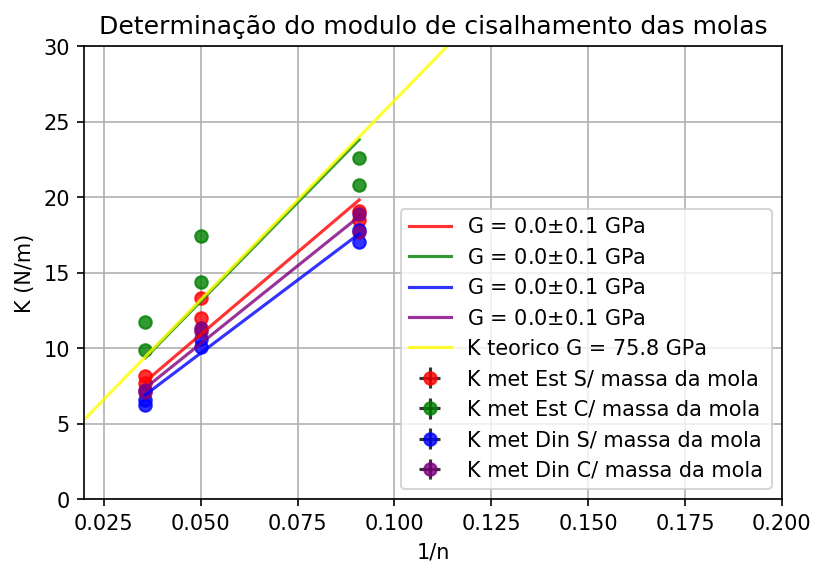

In [87]:
import matplotlib.pyplot as plt

g0 = (B[0], C[0])
g1 = (B[0], C[1])
g2 = (B[0], C[2])
g3 = (B[0], C[3])
g4 = (B[0], test_func(B[0], paramsKes[0]))
g5 = (B[0], test_func(B[0], paramsKec[0]))
g6 = (B[0], test_func(B[0], paramsKds[0]))
g7 = (B[0], test_func(B[0], paramsKdc[0]))

data = (g0, g1, g2, g3)
data2 = (g4, g5, g6, g7)
colors = ("red", "green", "blue", "purple")
groups = ("K met Est S/ massa da mola",
          "K met Est C/ massa da mola",
          "K met Din S/ massa da mola",
          "K met Din C/ massa da mola")
legendas = (f'G = {Gcalculado[0]/10**9:.1f}' r'$ \pm $' "0.1 GPa",
            f'G = {Gcalculado[1]/10**9:.1f}' r'$ \pm $' "0.1 GPa",
            f'G = {Gcalculado[2]/10**9:.1f}' r'$ \pm $' "0.1 GPa",
            f'G = {Gcalculado[3]/10**9:.1f}' r'$ \pm $' "0.1 GPa")

# Create plot

fig = plt.figure(dpi=150)

ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

for data, color, group, legenda, data2 in zip(data, colors, groups, legendas, data2):
    x, y = data
    x2, y2 = data2
    ax.errorbar(x, y, yerr=.00001, xerr=0.00001, fmt='o', ecolor='k', barsabove=True, alpha=0.8, c=color, label=group)
    ax.plot(x2, y2, alpha=0.8, c=color, label=legenda)
    ax.grid(True)
    
    ax.axis([0.02, .2, 0, 30])
    
ax.plot(nteorico, Kteorico[0], alpha=0.8, c="yellow", label="K teorico G = 75.8 GPa")
ax.legend(loc=4)

plt.xlabel('1/n')
plt.ylabel('K (N/m)')
plt.title('Determinação do modulo de cisalhamento das molas')
plt.show()